In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test_identity.csv
/kaggle/input/test_transaction.csv
/kaggle/input/sample_submission.csv
/kaggle/input/train_transaction.csv
/kaggle/input/train_identity.csv


### train_transaction.csv 파일과 train_identity.csv 파일 비교분석

두 파일의 공통점은 'TransactionID' 이다. 공통키 역할을 한다.

그런데 train_transaction.csv 파일의 TransactionID는 연속적인 반면에

train_identity.csv 파일의 TransactionID는 불연속적이다.

그래서 두 파일에 모두 존재하는 TransactionID를 기준으로 두 테이블을 합쳐야한다.

In [49]:
# 읽기모드로 train용 *.csv파일을 오픈한다.
train_transaction= pd.read_csv('../input/train_transaction.csv')
train_identity = pd.read_csv('../input/train_identity.csv')

# 합치기 전에 두 csv파일의 shape에 대해 알아보자.
print('train_transaction.shape: ',train_transaction.shape)
print('train_identity.shape: ',train_identity.shape)

train_transaction.shape:  (590540, 394)
train_identity.shape:  (144233, 41)


상대적으로 train_identity에 비해 

train_transaction이 더 큰 데이터를 보유하고 있음을 알 수있다.

합치기 전에 DataFrame.info() 메소드를 이용하여 

각 csv파일에 대한 정보를 탐색해본다.

In [50]:
# 읽기모드로 test용 *.csv파일을 오픈한다.
test_transaction= pd.read_csv('../input/test_transaction.csv')
test_identity= pd.read_csv('../input/test_identity.csv')

# 두 csv파일의 shape를 찍어본다.
print('test_transaction.shape: ', test_transaction.shape)
print('test_identity.shape: ', test_identity.shape)

test_transaction.shape:  (506691, 393)
test_identity.shape:  (141907, 41)


마찬가지로 test_transaction이 test_identity보다

더 많은 데이터셋을 보유하고 있다.

**test_transaction**: **506691**개의 행, 393개의 컬럼

**test_identity**   : **141907**개의 행, 41 개의 컬럼

In [51]:
# train_transaction
# train_transaction의 row의 개수 : 590540 개 / 컬럼개수: 394개
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [52]:
# train_identity
# train_identity의 row의 개수 : 144233 개 / 컬럼개수: 41개
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [53]:
# test_transaction.info()
test_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [54]:
# test_identity.info()
test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
TransactionID    141907 non-null int64
id_01            141907 non-null float64
id_02            136976 non-null float64
id_03            66481 non-null float64
id_04            66481 non-null float64
id_05            134750 non-null float64
id_06            134750 non-null float64
id_07            5059 non-null float64
id_08            5059 non-null float64
id_09            74338 non-null float64
id_10            74338 non-null float64
id_11            136778 non-null float64
id_12            141907 non-null object
id_13            130286 non-null float64
id_14            71357 non-null float64
id_15            136977 non-null object
id_16            125747 non-null object
id_17            135966 non-null float64
id_18            50875 non-null float64
id_19            135906 non-null float64
id_20            135633 non-null float64
id_21            5059 non-null float64
id_2

train_transaction 컬럼개수: 394개

test_transaction 컬럼개수: 393개

1개의 차이는 결과레이블인 **isFraud** 컬럼이다.

train_identity 컬럼개수: 41개

test_identity 컬럼개수 : 41개

In [55]:
# train_transaction과 train_identity의 공통키인 
# TransactionID의 개수를 카운트한다.
print('train_transaction의 TransactionID 개수:', \
     train_transaction['TransactionID'].count())

print('train_identity의 TransactionID 개수: ', \
     train_identity['TransactionID'].count())

train_transaction의 TransactionID 개수: 590540
train_identity의 TransactionID 개수:  144233


TransactionID 의 개수만을 세보면서 알 수 있는 것은 

각각의 csv파일의 TransactionID의 개수는 

각 csv 파일의 행(ROW)의 개수와 동일하다는 것이다.

그렇다면 train_transaction에서 

train_identity와 겹치는 TransactionID가 몇개인지 확인해보자.

동일한 방법으로 test_transaction 과test_identity와 겹치는 

TransactionID가 몇 개인지도 확인해보자.



In [56]:
print('train_transaction, train_identity 중 겹치는 TransactionID 개수\n: ',\
      np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'])))

print('test_transaction, test_identity 중 겹치는 TransactionID 개수\n: ',\
      np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'])))


train_transaction, train_identity 중 겹치는 TransactionID 개수
:  144233
test_transaction, test_identity 중 겹치는 TransactionID 개수
:  141907


#### 공통키 TransactionID를 기준으로 train(test)_transaction 와 train(test)_identity 를 합쳐본다.

In [57]:
# train_identity의 TransactionID를 기준으로 데이터셋을 합쳐보자.
train_merged = pd.merge(train_transaction, train_identity, 
                        on='TransactionID', how='right')

test_merged= pd.merge(test_transaction, test_identity,
                     on='TransactionID', how='right' )

In [58]:
# train_identity를 기준으로 merge시켜봤다. 데이터의 손실이 크겠지만.. 그래도 해보자...
train_merged.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [59]:
# train_merged 의 전체 row개수는?
print('train_merged.shape: ', train_merged.shape[0])

# test_merged 의 전체 row개수는?
print('test_merged.shape: ', test_merged.shape[0])

train_merged.shape:  144233
test_merged.shape:  141907


## 불필요한 속성 제거
그런데 train_merged에서 데이터 row를 구분하는 ID는 이제 필요 없다.

TransactionID를 drop 시켜보자.

In [60]:
train_merged.drop('TransactionID', axis=1, inplace=True)

In [61]:
# train_merged_columns_len=len(train_merged.columns)
# isFraud를 제외한 나머지 컬럼의 개수를 카운트
# for i in range(1, train_merged_columns_len): 
#         print('train_merged[{}] 개수: {}개'.format(train_merged.columns[i],train_merged.iloc[:,i].count()))

# train_merged의 컬럼 개수를 카운트하여 출력하는 함수
def count_columns(df):
    tm_columns= df.columns
    for column in tm_columns:
        cnt=df[column].count()
        print('{} cnt: {}'.format(column, cnt))

count_columns(train_merged)

isFraud cnt: 144233
TransactionDT cnt: 144233
TransactionAmt cnt: 144233
ProductCD cnt: 144233
card1 cnt: 144233
card2 cnt: 143331
card3 cnt: 144061
card4 cnt: 144049
card5 cnt: 143277
card6 cnt: 144055
addr1 cnt: 83786
addr2 cnt: 83786
dist1 cnt: 0
dist2 cnt: 37593
P_emaildomain cnt: 130842
R_emaildomain cnt: 131083
C1 cnt: 144233
C2 cnt: 144233
C3 cnt: 144233
C4 cnt: 144233
C5 cnt: 144233
C6 cnt: 144233
C7 cnt: 144233
C8 cnt: 144233
C9 cnt: 144233
C10 cnt: 144233
C11 cnt: 144233
C12 cnt: 144233
C13 cnt: 144233
C14 cnt: 144233
D1 cnt: 144015
D2 cnt: 31116
D3 cnt: 29059
D4 cnt: 64768
D5 cnt: 33075
D6 cnt: 67373
D7 cnt: 36140
D8 cnt: 74926
D9 cnt: 74926
D10 cnt: 69232
D11 cnt: 0
D12 cnt: 58909
D13 cnt: 61936
D14 cnt: 62165
D15 cnt: 68317
M1 cnt: 0
M2 cnt: 0
M3 cnt: 0
M4 cnt: 60831
M5 cnt: 0
M6 cnt: 0
M7 cnt: 0
M8 cnt: 0
M9 cnt: 0
V1 cnt: 0
V2 cnt: 0
V3 cnt: 0
V4 cnt: 0
V5 cnt: 0
V6 cnt: 0
V7 cnt: 0
V8 cnt: 0
V9 cnt: 0
V10 cnt: 0
V11 cnt: 0
V12 cnt: 69181
V13 cnt: 69181
V14 cnt: 69181
V1

In [62]:
# 어떤 속성(attribute)는 존재하지 않은 것들도 있다.
# 데이터의 개수가 존재하지 않는 컬럼은 지운다.
tm_columns= train_merged.columns
for column in tm_columns:
    cnt=train_merged[column].count()
    if cnt==0: #데이터 개수가 없는 컬럼은 삭제
        train_merged.drop(column, axis=1, inplace=True)
        
count_columns(train_merged)

isFraud cnt: 144233
TransactionDT cnt: 144233
TransactionAmt cnt: 144233
ProductCD cnt: 144233
card1 cnt: 144233
card2 cnt: 143331
card3 cnt: 144061
card4 cnt: 144049
card5 cnt: 143277
card6 cnt: 144055
addr1 cnt: 83786
addr2 cnt: 83786
dist2 cnt: 37593
P_emaildomain cnt: 130842
R_emaildomain cnt: 131083
C1 cnt: 144233
C2 cnt: 144233
C3 cnt: 144233
C4 cnt: 144233
C5 cnt: 144233
C6 cnt: 144233
C7 cnt: 144233
C8 cnt: 144233
C9 cnt: 144233
C10 cnt: 144233
C11 cnt: 144233
C12 cnt: 144233
C13 cnt: 144233
C14 cnt: 144233
D1 cnt: 144015
D2 cnt: 31116
D3 cnt: 29059
D4 cnt: 64768
D5 cnt: 33075
D6 cnt: 67373
D7 cnt: 36140
D8 cnt: 74926
D9 cnt: 74926
D10 cnt: 69232
D12 cnt: 58909
D13 cnt: 61936
D14 cnt: 62165
D15 cnt: 68317
M4 cnt: 60831
V12 cnt: 69181
V13 cnt: 69181
V14 cnt: 69181
V15 cnt: 69181
V16 cnt: 69181
V17 cnt: 69181
V18 cnt: 69181
V19 cnt: 69181
V20 cnt: 69181
V21 cnt: 69181
V22 cnt: 69181
V23 cnt: 69181
V24 cnt: 69181
V25 cnt: 69181
V26 cnt: 69181
V27 cnt: 69181
V28 cnt: 69181
V29 cnt:

# EDA
## (1) Target: isFraud 시각화

#### train_merge 에서 isFraud의 분포를 그려보자.

isFraud=0 => No-Fraud<br>
isFraud=1 => Fraud<br>

train_merge 에서<br>
isFraud=0 인 데이터의 개수는 132915개<br>
isFraud=1 인 데이터의 개수는 11318개 이다.<br>

In [63]:
isFraud_vals=train_merged['isFraud'].value_counts()
isFraud_vals

0    132915
1     11318
Name: isFraud, dtype: int64

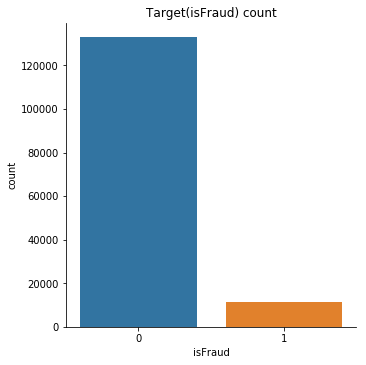

In [64]:
sns.catplot(data=train_merged, 
            x="isFraud",
            kind='count',
           )
plt.title('Target(isFraud) count')
plt.show()
# fraud인 데이터가 아닌데이터보다 상당히 적다..

In [102]:
# 나중 데이터 분석을 위해서 train_merged 데이터셋에서
# isFraud=1인 데이터와 isFraud=0인 데이터를 분리시킨다.

fraud_df = train_merged.loc[ train_merged['isFraud']==1]
not_fraud_df = train_merged.loc[ train_merged['isFraud']==0]

## (2) TransactionAmt

train_merged['TransactionAmt'] 값을 분석해보면<br>
최솟값: 0.251<br>
최댓값: 1800<br>
평균값: 83.554533<br>

In [65]:
train_merged['TransactionAmt'].describe()

count    144233.000000
mean         83.554533
std          99.850258
min           0.251000
25%          25.453000
50%          50.000000
75%         100.000000
max        1800.000000
Name: TransactionAmt, dtype: float64

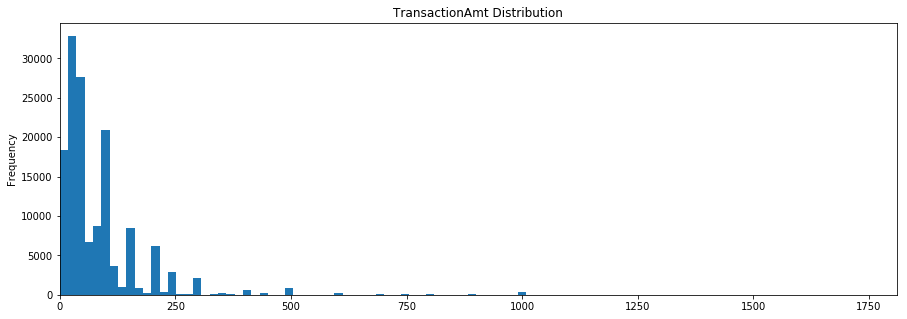

In [66]:
# 그냥 TransactionAmt 그대로 그렸더니.. 한쪽으로 치우져진다.
train_merged['TransactionAmt'].plot(
    figsize=(15,5),
    kind='hist',
    title='TransactionAmt Distribution',
    bins=100,
    xlim=(0 , max(train_merged['TransactionAmt'])+10)
)
plt.show()

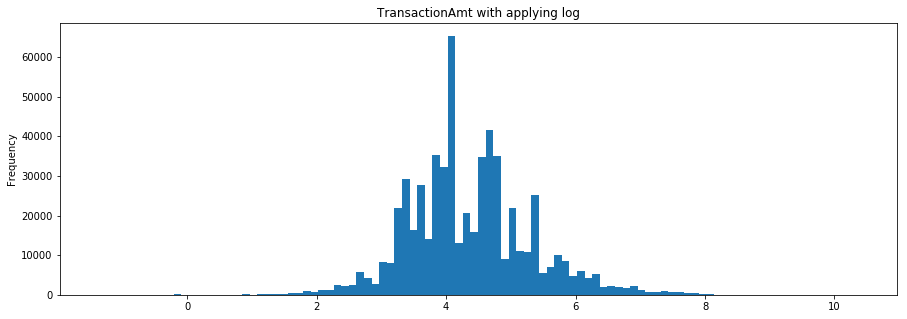

In [97]:
# apply_log
def apply_log_and_plot(df):
    ax=df.apply(np.log).plot(
        kind='hist',
        bins=100,
        figsize=(15,5)
    )
    return ax

ax1=apply_log_and_plot(train_transaction['TransactionAmt'])
plt.title('TransactionAmt with applying log')
plt.show()

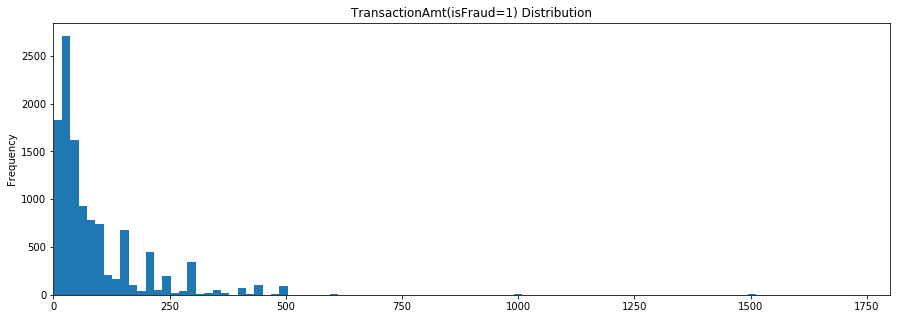

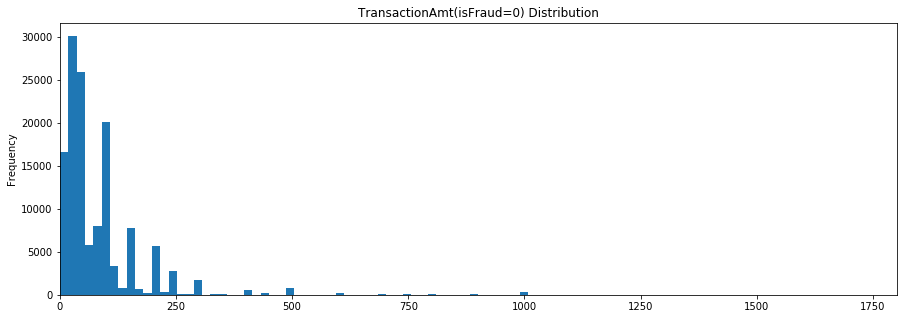

In [103]:
# 그러면 TransactionAmt와 isFraud가 서로 관계가 있을까?
# isFraud=1인 데이터중에서 TransactionAmt값의 분포를 알고 싶다.
transaction_amt_fraud1=fraud_df['TransactionAmt']
transaction_amt_fraud1.plot(
    figsize=(15,5),
    kind='hist',
    title='TransactionAmt(isFraud=1) Distribution',
    bins=100,
    xlim=(0,max(transaction_amt_fraud1)+1)
)
plt.show()


# isFraud=0인 데이터중에서 TransactionAmt값의 분포를 알고 싶다.
transaction_amt_fraud0=not_fraud_df['TransactionAmt']
transaction_amt_fraud0.plot(
    figsize=(15,5),
    kind='hist',
    title='TransactionAmt(isFraud=0) Distribution',
    bins=100,
    xlim=(0,max(transaction_amt_fraud0)+1)
)
plt.show()


거의 비슷해보여서 TransactionAmt로 구분이 될 수 있을지가 모르겠다...

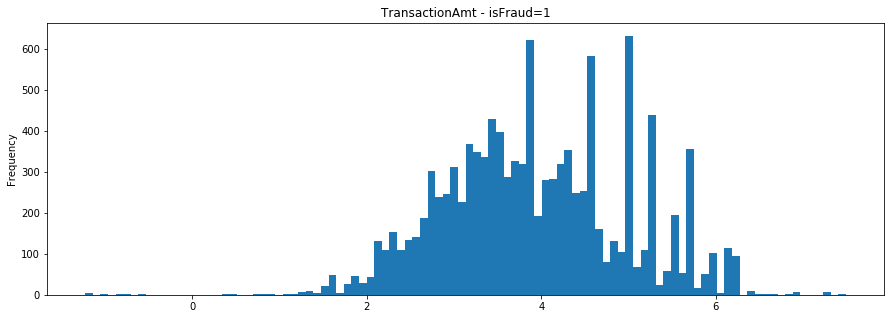

In [100]:
# 로그를 취해서 그래프를 살펴본다.
apply_log_and_plot(transaction_amt_fraud1)
plt.title('TransactionAmt - isFraud=1')
plt.show()

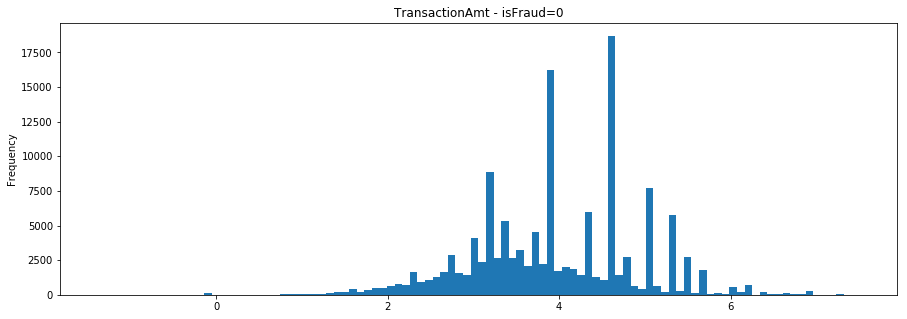

In [101]:
apply_log_and_plot(transaction_amt_fraud0)
plt.title('TransactionAmt - isFraud=0')
plt.show()

## (3) ProductCD

In [69]:
# train_merged[ProductCD] 개수: 144233개
product_cd_val_cnt=train_merged['ProductCD'].value_counts()
product_cd_val_cnt

C    62192
R    37548
H    32908
S    11585
Name: ProductCD, dtype: int64

product_cd_val_cnt.index
 Index(['C', 'R', 'H', 'S'], dtype='object')
product_cd_val_cnt.values
 [62192 37548 32908 11585]


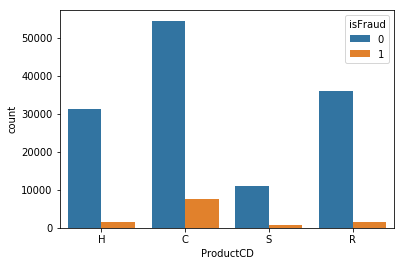

In [70]:
print('product_cd_val_cnt.index\n',product_cd_val_cnt.index)  #(['C','R','H','S'])
print('product_cd_val_cnt.values\n',product_cd_val_cnt.values) #array[62192, 37548, 32908, 11585]

sns.countplot(x="ProductCD", hue="isFraud", data=train_merged)

여기서 알 수 있는 결론은 각각의 ProductCD속성에 대하여 

fraud인 데이터(isFraud=1)는 아닌데이터(isFraud=0)보다 

상당히 적은 개수로 존재한다. 

그러나 Fraud=1인 데이터 중에서는 C가 상당히 높은 값을 갖는다..

겉보기에는 S가 제일 적어보이고 H,R은 비슷해보인다.

그렇다면 isFraud=1인 데이터 중에서 ProductCD 를 다시 조사해보자.

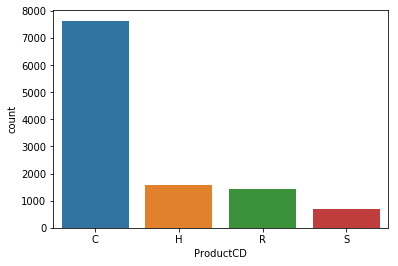

In [113]:
# isFraud=1인 데이터중 ProductCD 컬럼에 대한 정보만을 추출.
# 내림 차순으로 ordering을 한다.
sns.countplot(x='ProductCD',data=fraud_df, 
              order=fraud_df['ProductCD'].value_counts().index)

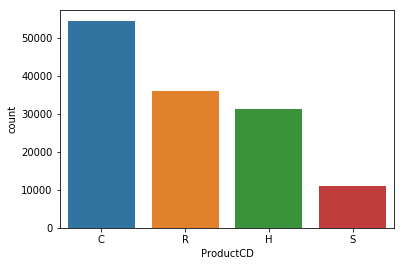

In [114]:
# isFraud=0 (거짓이 없는 데이터)에서도 ProductCD 분포를 알아본다.
sns.countplot(x='ProductCD', data=not_fraud_df, 
              order=not_fraud_df['ProductCD'].value_counts().index )

## card1

In [72]:
train_merged['card1'].describe()

count    144233.000000
mean       9879.012528
std        5047.643179
min        1000.000000
25%        5713.000000
50%        9633.000000
75%       15063.000000
max       18396.000000
Name: card1, dtype: float64

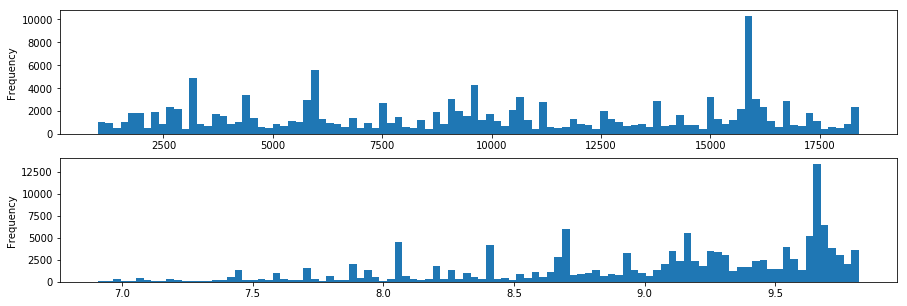

In [121]:
# 전체 데이터셋에서 card1의 분포
plt.figure(figsize=(10,6))
plt.subplot(211)
train_merged['card1'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5)
)

# train_merged['card1']의 데이터셋을 log 취한 결과를 시각화.
plt.subplot(212)
tm1= apply_log_and_plot(train_merged['card1'])

In [123]:
fraud_df['card1'].describe()

count    11318.000000
mean      9280.986128
std       4777.945008
min       1015.000000
25%       5009.000000
50%       9633.000000
75%      13809.000000
max      18375.000000
Name: card1, dtype: float64

In [140]:
not_fraud_df['card1'].describe()

count    132915.000000
mean       9929.935771
std        5066.702739
min        1000.000000
25%        5812.000000
50%        9781.000000
75%       15066.000000
max       18396.000000
Name: card1, dtype: float64

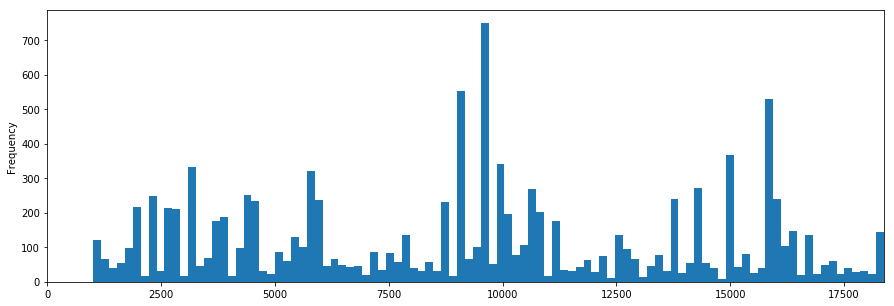

In [136]:
# isFraud=1인 데이터중 card1 값의 분포
fraud_df['card1'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5),
    xlim=(0,max(fraud_df['card1'])+1)
)

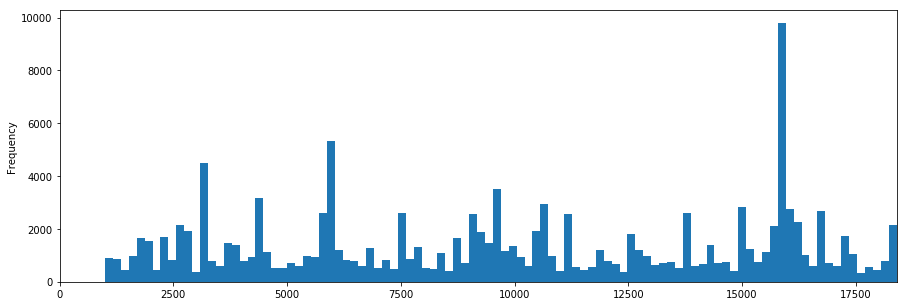

In [139]:
# isFraud=0인 데이터의 'card1' 데이터를 시각화
not_fraud_df['card1'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5),
    xlim=(0, max(not_fraud_df['card1'])+1)
)

In [156]:
# 데이터의 정보를 더 잘 살펴볼 수 있는 함수를 만들어본다.
# 참고 커널: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt
def see_better_info(df):
    summary=pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[ ['Name', 'dtypes']]
    summary['Missing']= df.isnull().sum().values
    summary['Uniques']= df.nunique().values
    
    return summary

# C1 ~ C14

In [157]:
Cs= ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
see_better_info(train_merged[Cs])

,Name,dtypes,Missing,Uniques
0,C1,float64,0,1559
1,C2,float64,0,1182
2,C3,float64,0,27
3,C4,float64,0,1202
4,C5,float64,0,1
5,C6,float64,0,1194
6,C7,float64,0,1036
7,C8,float64,0,1236
8,C9,float64,0,1
9,C10,float64,0,1211


In [161]:
train_merged[Cs].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,144233.000000,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000
mean,27.793681,34.344533,0.023032,15.603558,0.0,15.583036,10.512830,19.395173,0.0,19.787483,20.359425,14.811687,20.517850,10.499685
std,249.745336,291.306999,0.303819,131.944756,0.0,132.514335,117.037122,181.039192,0.0,181.760988,176.778700,164.194903,165.660021,87.186134
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,2.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000
max,4685.000000,5691.000000,26.000000,2253.000000,0.0,2253.000000,2255.000000,3331.000000,0.0,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


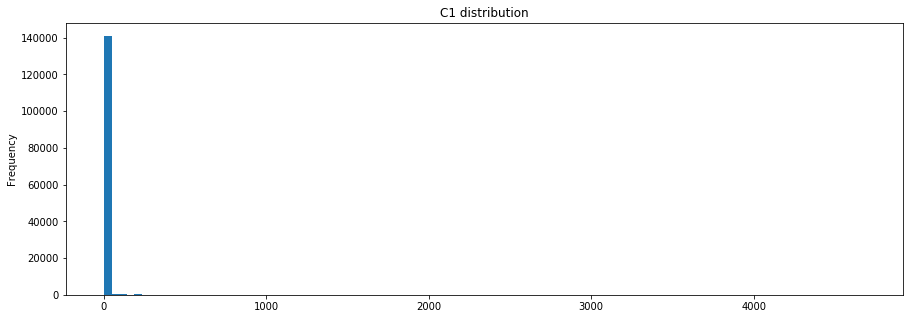

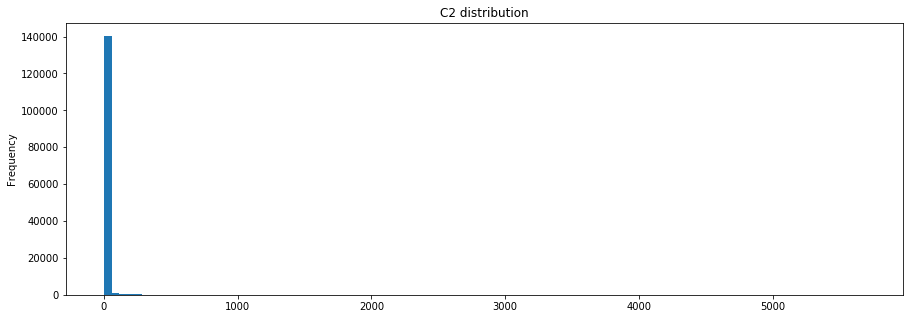

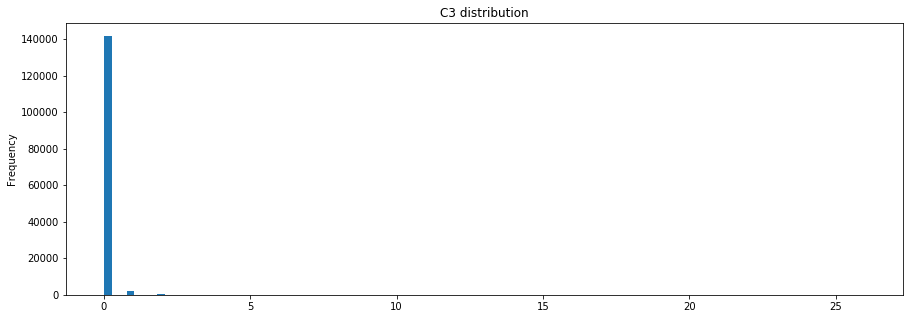

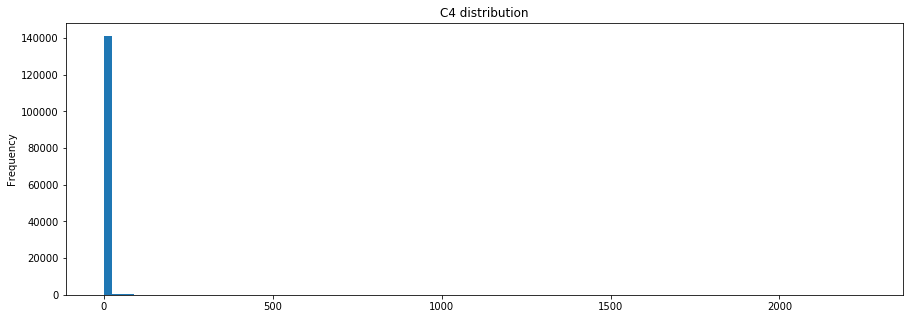

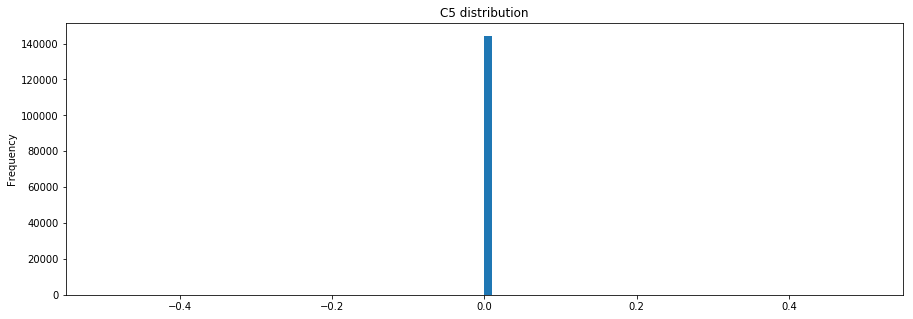

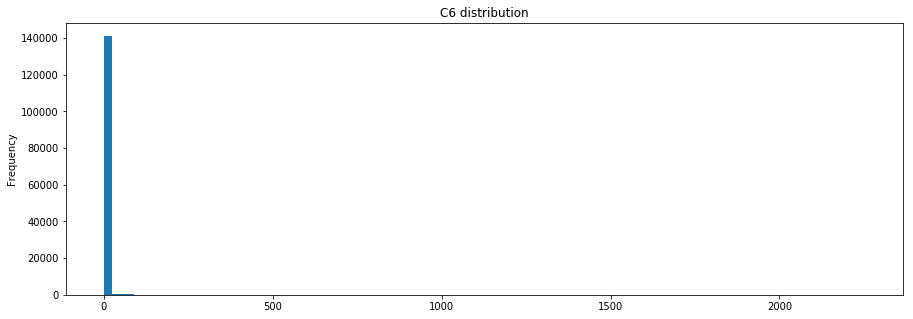

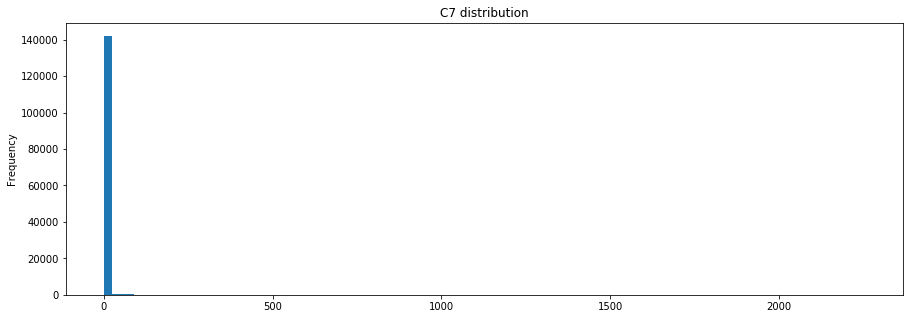

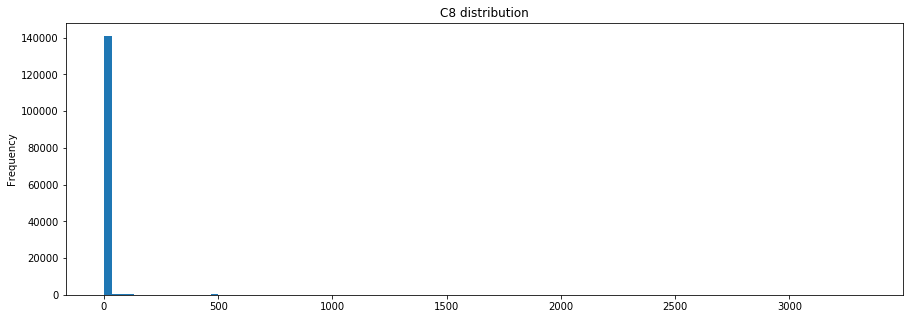

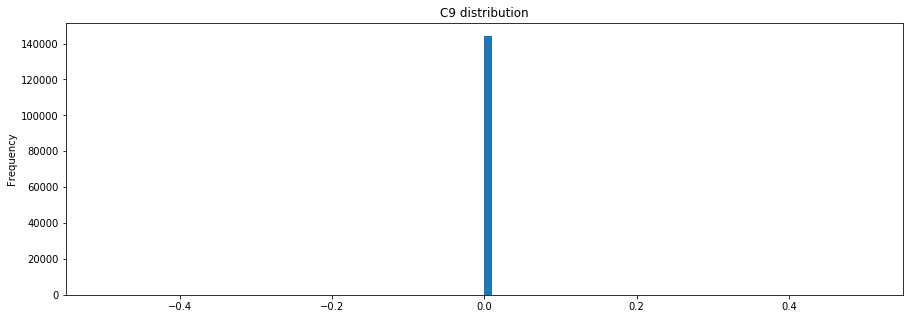

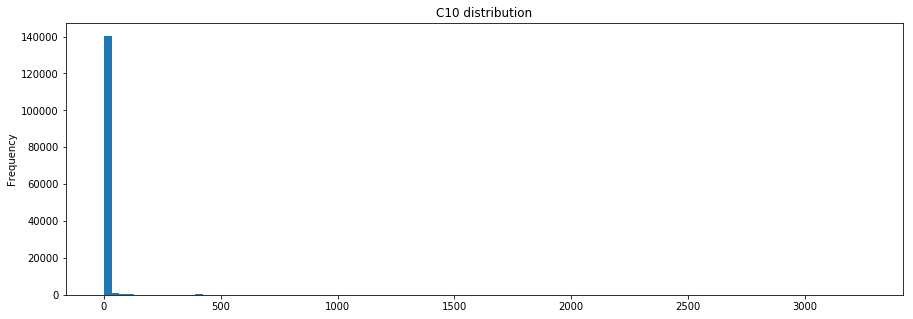

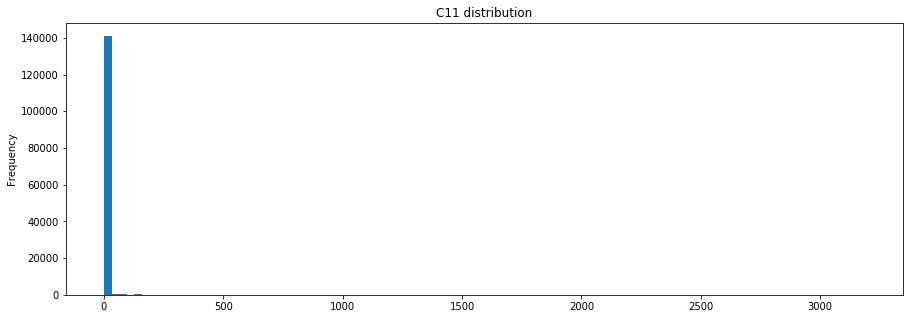

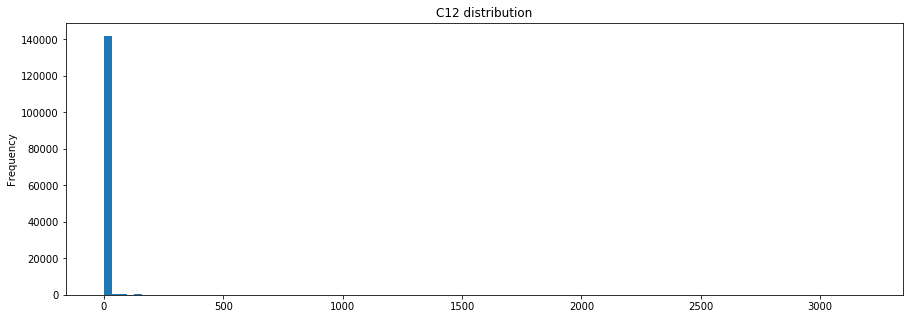

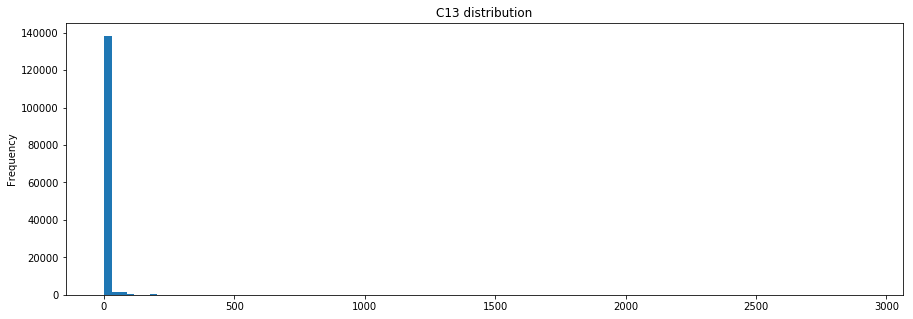

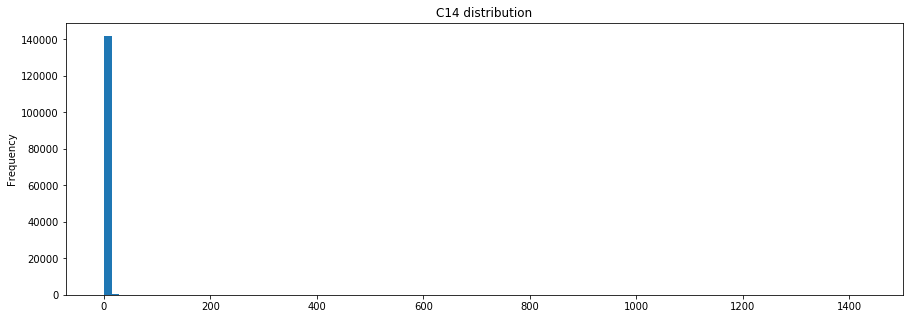

In [174]:
# C1~C14 까지 전체 데이터셋 분포 그래프로 나타내기.
for c in Cs:
    plt.figure()
    train_merged[c].plot(
        kind='hist',
        title='{} distribution'.format(c),
        figsize=(15,5),
        bins=100
    )

In [178]:
fraud_df[Cs].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,11318.000000,11318.00000,11318.000000,11318.000000,11318.0,11318.000000,11318.000000,11318.000000,11318.0,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000
mean,57.265948,74.59401,0.000442,26.089857,0.0,26.107351,20.427107,36.555487,0.0,33.445308,38.124580,31.640573,27.969076,14.846528
std,313.310395,370.91593,0.021015,163.072275,0.0,163.706538,148.559799,227.892717,0.0,228.527037,220.952956,208.988871,206.742269,107.313045
min,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,4.00000,0.000000,1.000000,0.0,1.000000,1.000000,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000
75%,13.000000,17.00000,0.000000,4.000000,0.0,4.000000,3.000000,7.000000,0.0,6.000000,6.000000,5.000000,3.000000,2.000000
max,4668.000000,5624.00000,1.000000,2240.000000,0.0,2240.000000,2242.000000,3317.000000,0.0,3244.000000,3170.000000,3170.000000,2903.000000,1417.000000


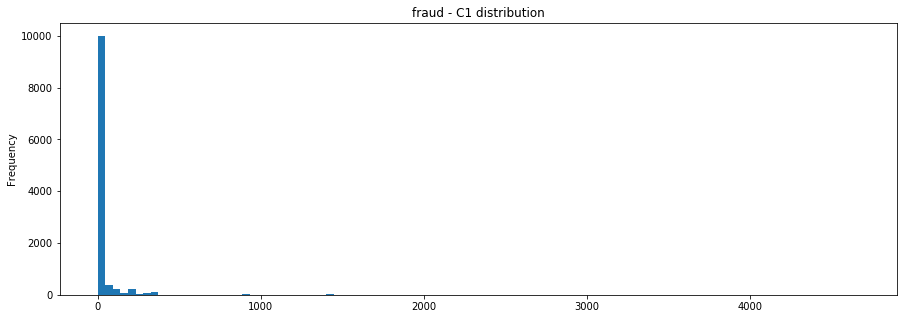

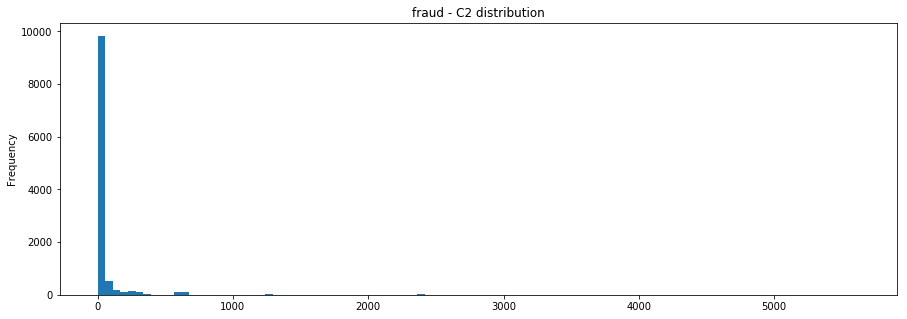

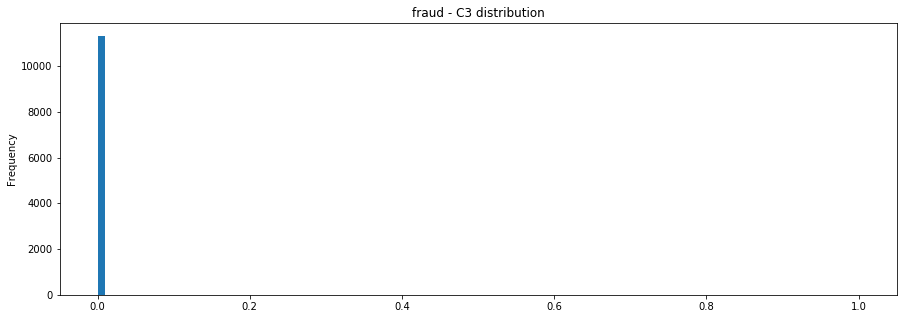

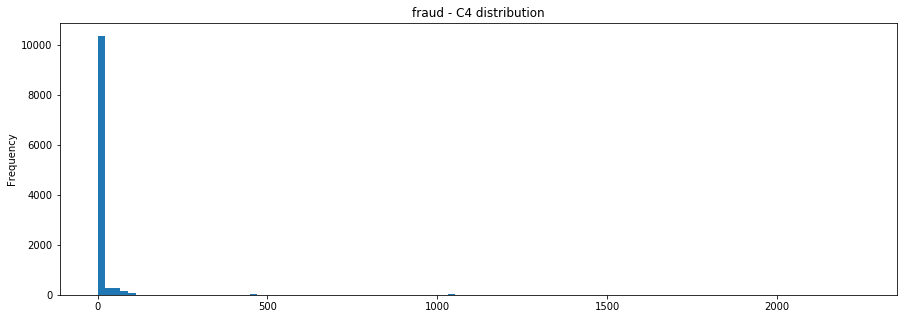

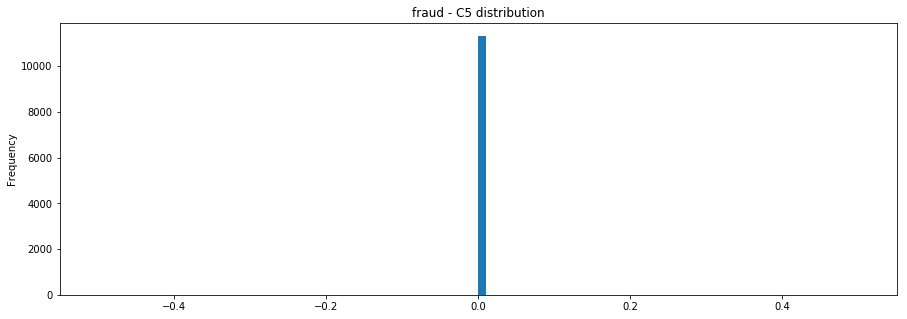

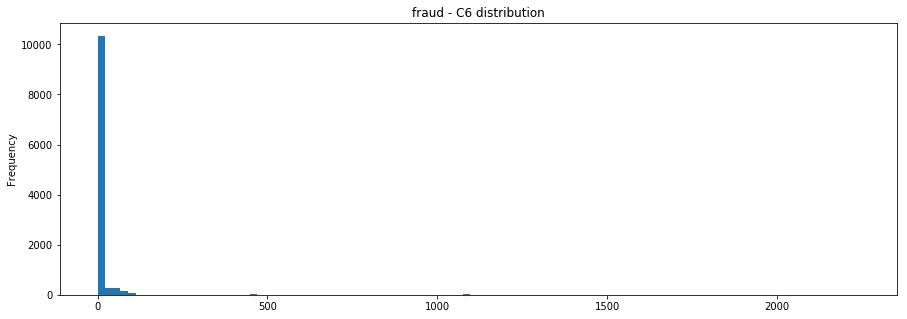

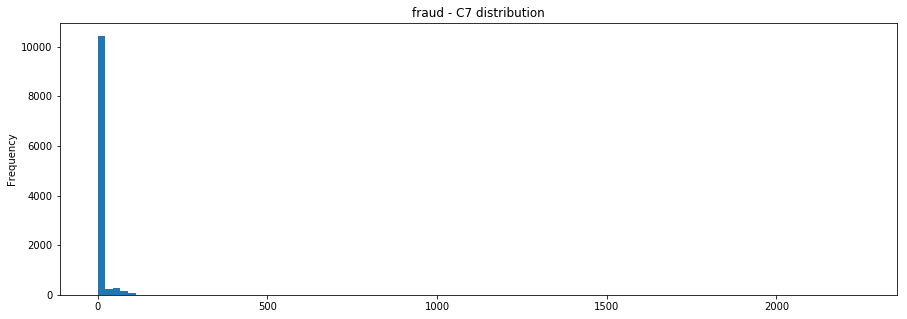

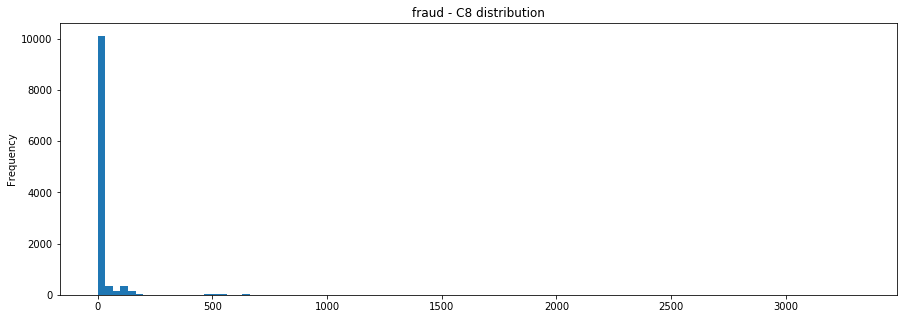

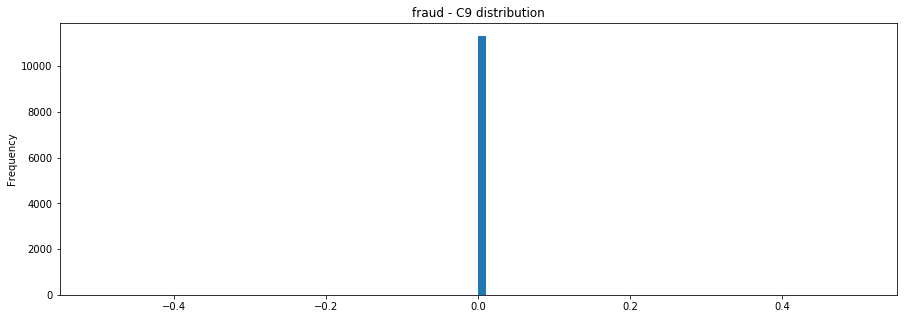

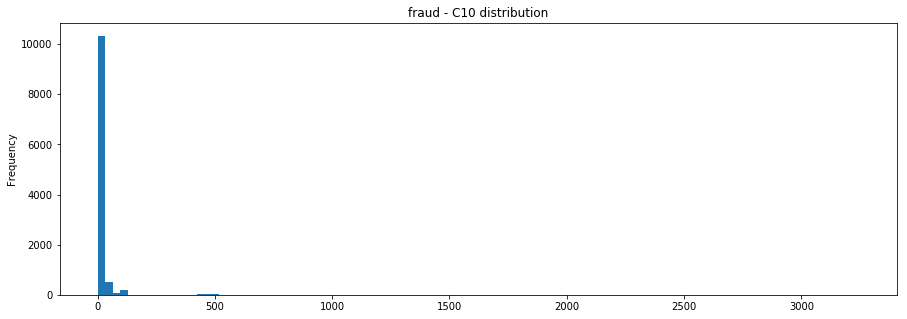

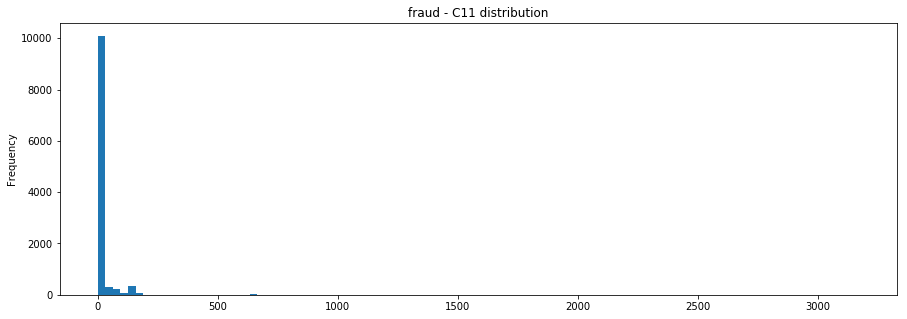

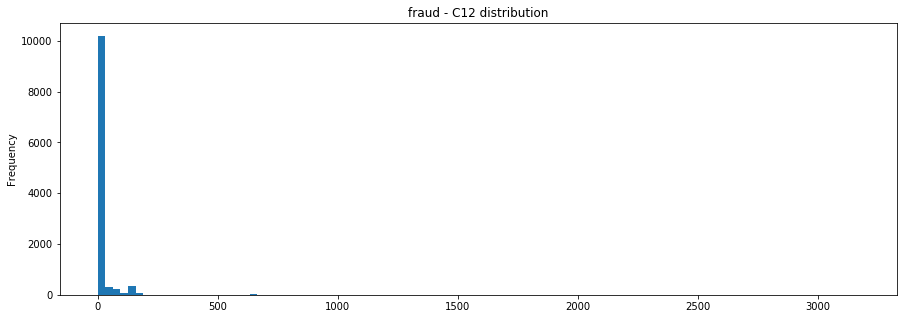

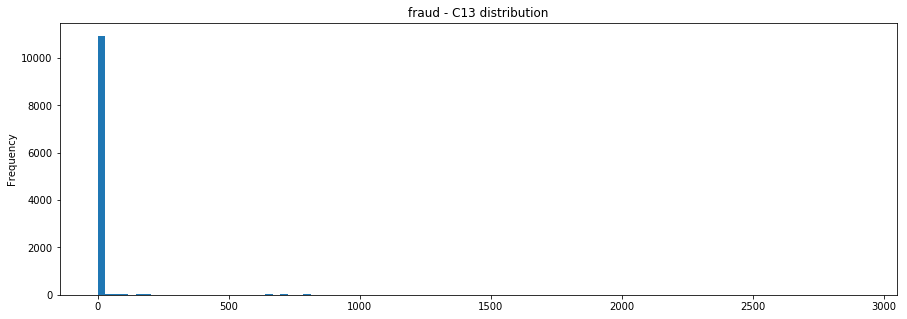

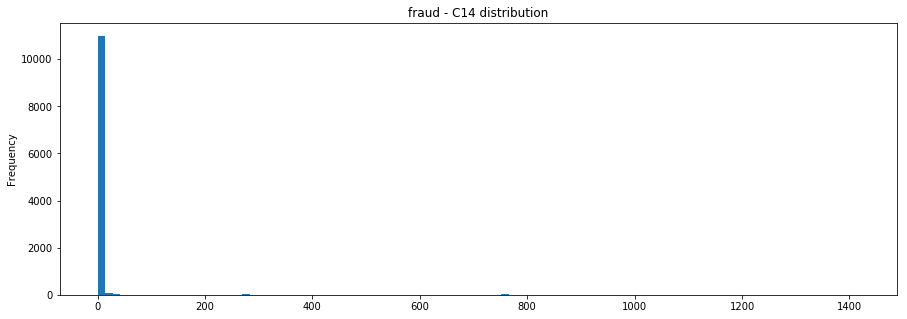

In [175]:
# C1~C14 까지 fraud_df(isFraud=1)의 분포 그래프로 나타내기.
for c in Cs:
    plt.figure()
    fraud_df[c].plot(
        kind='hist',
        title='fraud - {} distribution'.format(c),
        figsize=(15,5),
        bins=100
    )

In [179]:
not_fraud_df[Cs].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,132915.000000,132915.000000,132915.000000,132915.000000,132915.0,132915.000000,132915.000000,132915.000000,132915.0,132915.000000,132915.000000,132915.000000,132915.000000,132915.000000
mean,25.284054,30.917203,0.024956,14.710627,0.0,14.686868,9.668608,17.933935,0.0,18.624489,18.846684,13.378671,19.883362,10.129541
std,243.404051,283.234793,0.316356,128.908832,0.0,129.472864,113.911563,176.399687,0.0,177.161901,172.411778,159.720625,161.665304,85.243285
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,4685.000000,5691.000000,26.000000,2253.000000,0.0,2253.000000,2255.000000,3331.000000,0.0,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


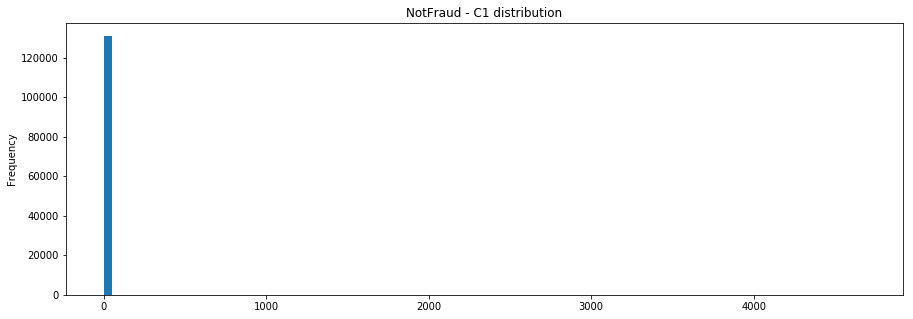

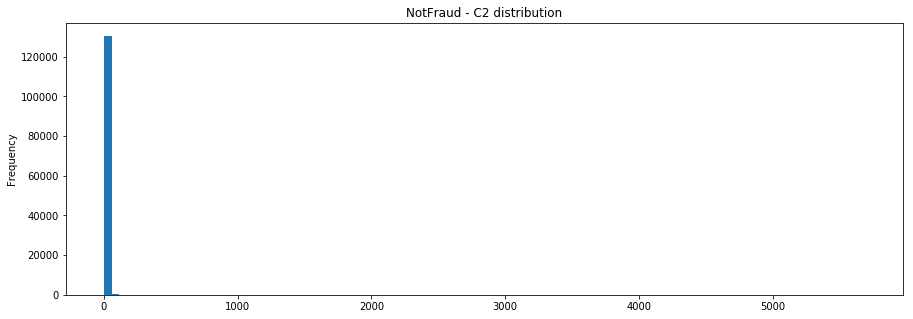

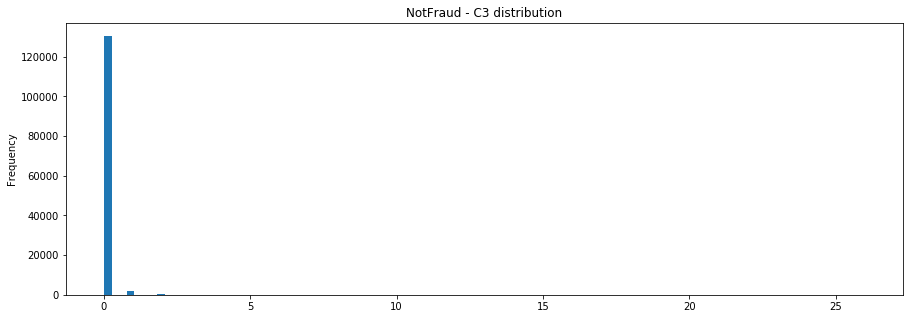

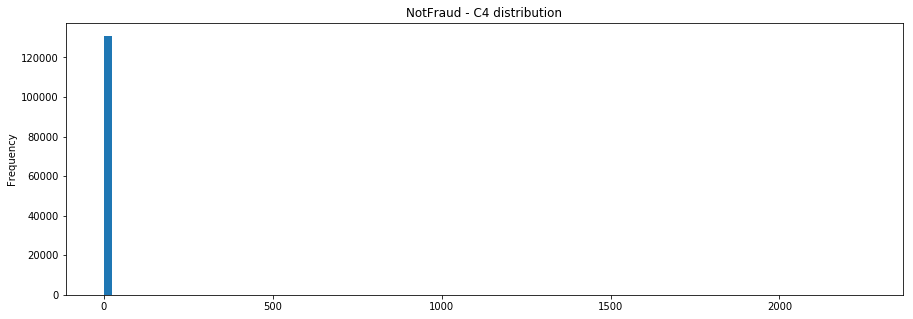

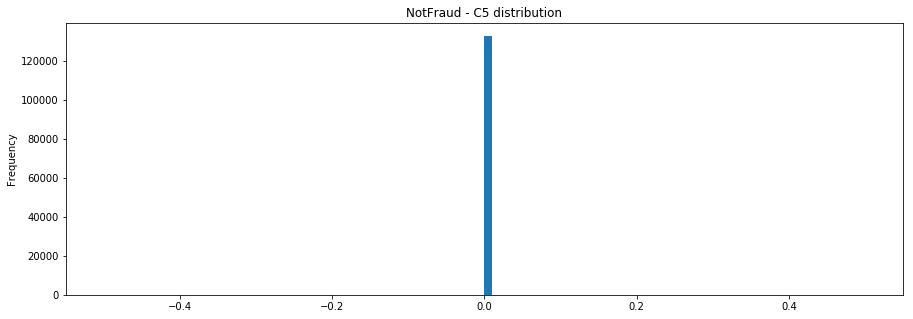

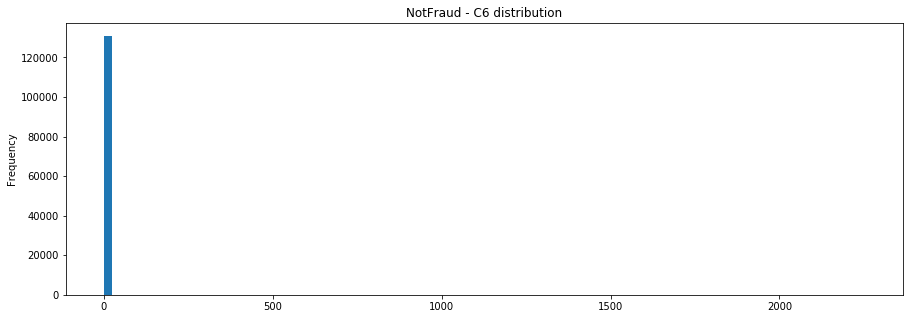

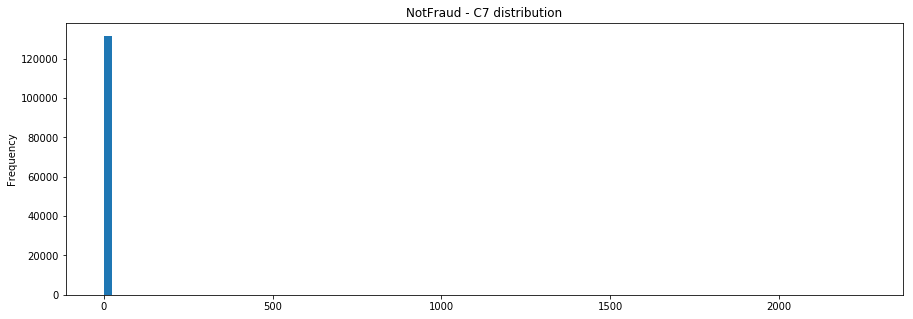

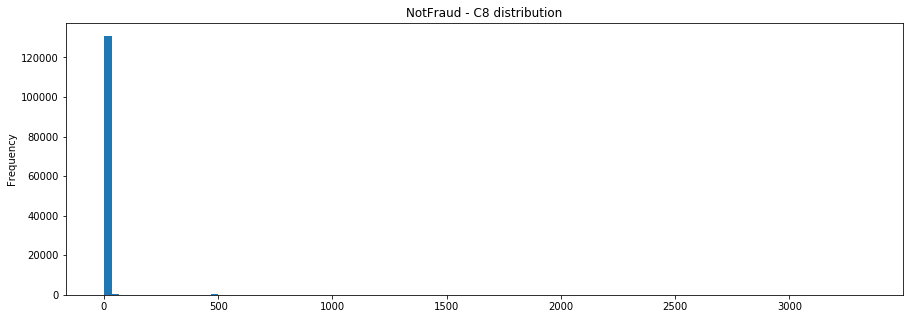

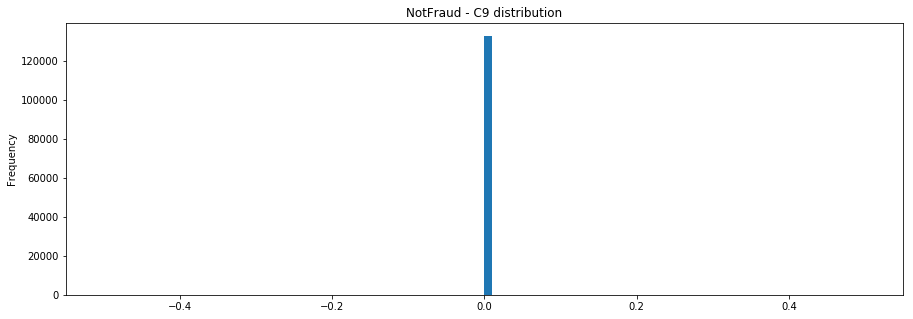

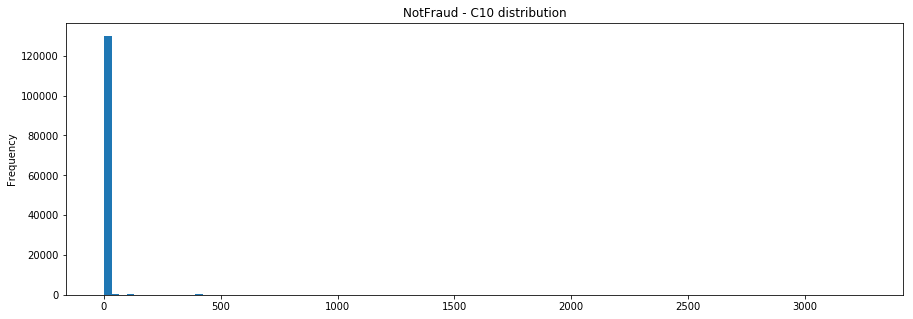

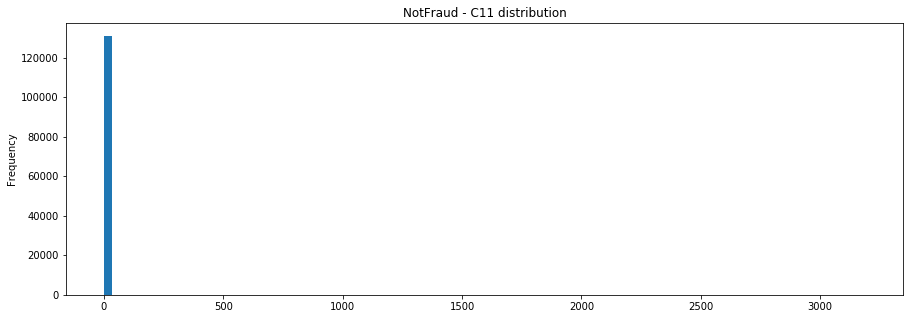

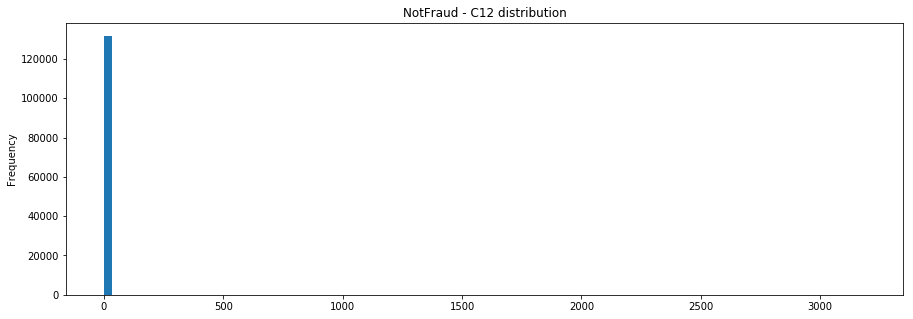

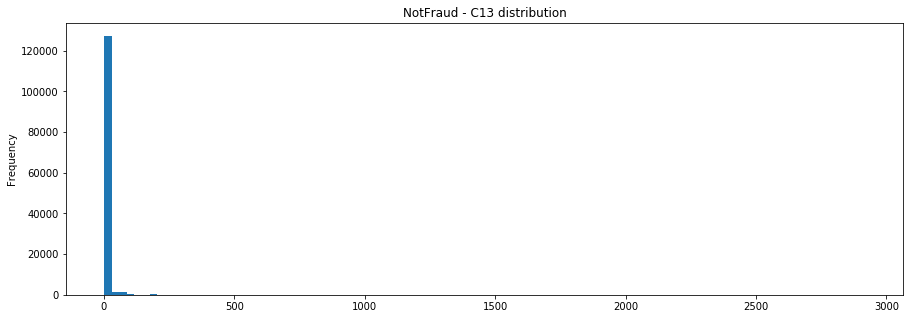

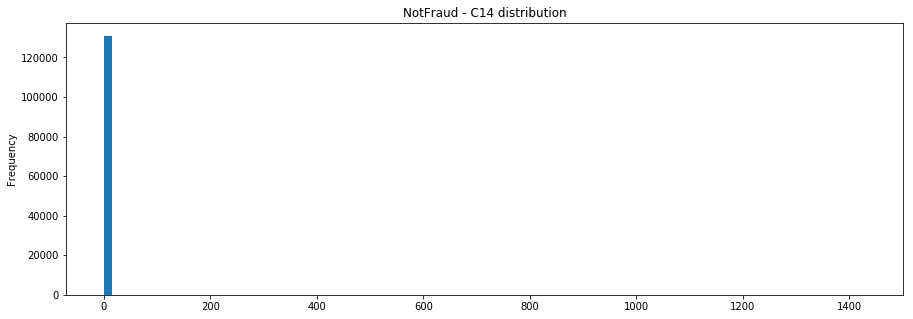

In [177]:
# C1~C14 까지 not_fraud_df(isFraud=0)의 분포 그래프로 나타내기.
for c in Cs:
    plt.figure()
    not_fraud_df[c].plot(
        kind='hist',
        title='NotFraud - {} distribution'.format(c),
        figsize=(15,5),
        bins=100
    )

# id_01, id_12
## (1) id_01

In [182]:
train_merged['id_01'].describe()

count    144233.000000
mean        -10.170502
std          14.347949
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

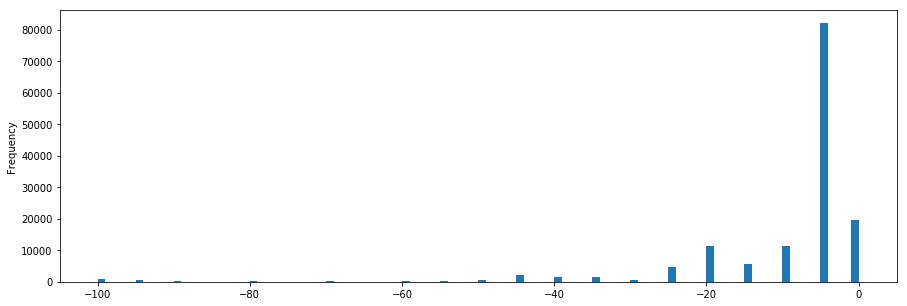

In [180]:
train_merged['id_01'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5)
)

In [183]:
fraud_df['id_01'].describe()

count    11318.000000
mean       -16.075632
std         20.397506
min       -100.000000
25%        -20.000000
50%         -5.000000
75%         -5.000000
max          0.000000
Name: id_01, dtype: float64

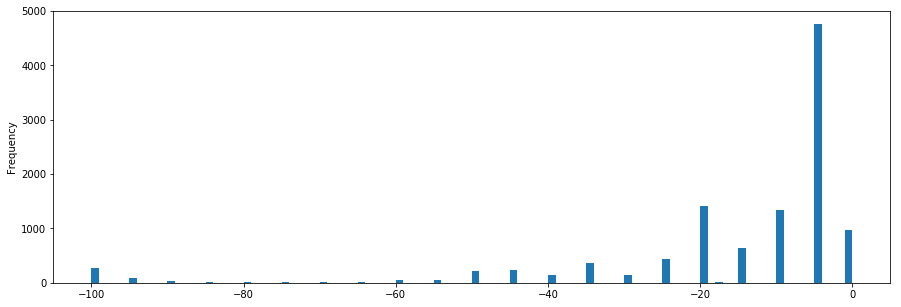

In [184]:
fraud_df['id_01'].plot(
    kind='hist',
    figsize=(15,5),
    bins=100
)

In [185]:
not_fraud_df['id_01'].describe()

count    132915.000000
mean         -9.667667
std          13.592128
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

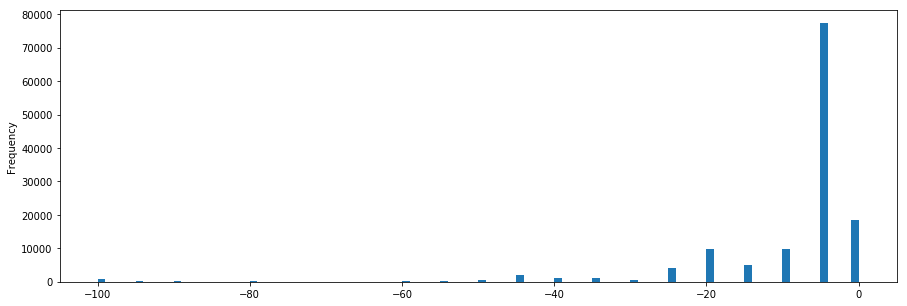

In [186]:
not_fraud_df['id_01'].plot(
    kind='hist',
    bins=100,
    figsize=(15,5)
)

## (2) id_12

In [190]:
train_merged['id_12'].value_counts()

NotFound    123025
Found        21208
Name: id_12, dtype: int64

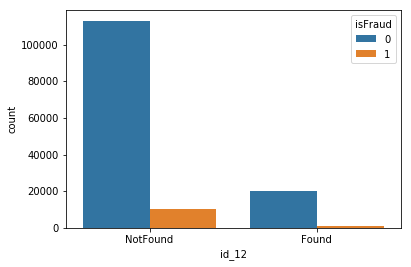

In [193]:
sns.countplot(x='id_12',hue='isFraud',  data=train_merged)